# Data

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

url = 'https://raw.githubusercontent.com/chekirou/International-conflict-prediction/master/data/actual.csv'

In [2]:
df = pd.read_csv(url)

In [3]:
csv1 = pd.read_csv('../raw_data/csv1.csv')
csv2 = pd.read_csv('../raw_data/csv2.csv')
csv3 = pd.read_csv('../raw_data/csv3.csv')
csv4 = pd.read_csv('../raw_data/csv4.csv')
csv5 = pd.read_csv('../raw_data/csv5.csv')
csv6 = pd.read_csv('../raw_data/csv6.csv')

In [4]:
csv1['CountryYear'] = csv1['Country']+csv1['Year'].astype(str)
csv2['CountryYear'] = csv2['Country']+csv2['Year'].astype(str)
csv3['CountryYear'] = csv3['Country']+csv3['Year'].astype(str)
csv4['CountryYear'] = csv4['Country']+csv4['Year'].astype(str)
csv5['CountryYear'] = csv5['Country']+csv5['Year'].astype(str)
csv6['CountryYear'] = csv6['Country']+csv6['Year'].astype(str)

In [5]:
csv_12 = pd.merge(csv1,csv2,on='CountryYear',how='outer')
csv_123 = pd.merge(csv_12,csv3,on='CountryYear',how='outer')
csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
csv_12345 = pd.merge(csv_1234,csv5,on='CountryYear',how='outer')
csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')

csv_full

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_83368/3997445115.py:3: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x', 'Year_x', 'ContinentCode_x', 'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_1234 = pd.merge(csv_123,csv4,on='CountryYear',how='outer')
/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_83368/3997445115.py:5: FutureWarning: Passing 'suffixes' which cause duplicate columns {'Code_x', 'Year_x', 'ContinentCode_x', 'Country_x'} in the result is deprecated and will raise a MergeError in a future version.
  csv_full = pd.merge(csv_12345,csv6,on='CountryYear',how='outer')


,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,Healthcare price index world average = 100,...,Security threats index 0 (low) - 10 (high),Factionalized elites index 0 (low) - 10 (high),Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high)
0,Afghanistan,AFG,AS,1960.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,Afghanistan,AFG,AS,1961.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,Afghanistan,AFG,AS,1962.0,NaN,64.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,AFG,AS,1963.0,NaN,40.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,AFG,AS,1964.0,NaN,56.0,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
12559,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12560,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12561,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
12562,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [6]:
conflicts = pd.read_csv('../raw_data/conflict_data/conflict_data_1970.csv')

In [7]:
def get_year(row):
    
    year_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [8]:
def get_country(row):
    
    country_name = row['CountryYear'][:-4]

    return country_name

In [9]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [10]:
csv_full['country_all'] = csv_full.apply(lambda x: get_country(x), axis=1)

# DELETING TINY PROVINCES/STATES

In [11]:
tiny_countries = ['Andorra','Antigua and Barbuda','Aruba','Belize','Bhutan','Brunei','Cape Verde','Comoros','Dominica','Kiribati',
                 'Micronesia','Montserrat','Palau','Saint Vincent and the Grenadines','Sao Tome and Principe','Solomon Islands','Taiwan',
                  'Tuvalu','Vanuatu','Euro area','Faroe Islands','Gibraltar','Macao','New Caledonia','San Marino','Norfolk Island','Holy See (Vatican City)']
csv_full = csv_full.set_index('country_all').drop(tiny_countries)
csv_full.reset_index(inplace=True)

In [12]:
csv_full['conflict_id'] =0
conflicts

csv_full[(csv_full['country_all']=='USA') & (csv_full['year_all']>1994)]

conflicts_1990 = conflicts[conflicts['Year']>1989]

In [13]:
my_list = []

def get_hist_data(country,year,lookback):
    
    early_year = lookback
    hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    while hist_data.shape[0] < lookback:
        early_year += 1
        
        hist_data = csv_full[(csv_full['country_all']==country) & (csv_full['year_all'] <= (year -1)) & (csv_full['year_all'] > (year -1 - early_year))]
    return hist_data

for index, row in conflicts_1990.iterrows():

    my_list.append(get_hist_data(row['Country'],row['Year'],5))


get_hist_data('USA',2010,10)    
    
len(my_list)
    

94

In [14]:
for i in range(len(my_list)):
    my_list[i]['conflict_id'] = i

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_83368/729059741.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  my_list[i]['conflict_id'] = i


In [15]:
for i in range(len(my_list)):
    if len(my_list[i]) < 5:
        print(i)

In [16]:
final_df = pd.DataFrame(columns=my_list[50].columns)

In [17]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id


In [18]:
for i in range(len(my_list)):
    
    final_df = pd.concat([final_df,my_list[i]])

In [19]:
final_df.shape

(470, 117)

In [20]:
final_df

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Cost of living index world average = 100,Food price index world average = 100,Housing and utilities price index world average = 100,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,Kazakhstan,KAZ,AS,2017.0,3.45,214.0,55.08,70.57,63.413,...,7.6,6.4,4.2,8.3,7.3,4.5,3.0,4.2,2017,93
3939,Kazakhstan,Kazakhstan,KAZ,AS,2018.0,4.65,310.0,NaN,NaN,NaN,...,7.9,5.9,3.9,8.4,7.0,4.2,2.7,3.9,2018,93
3940,Kazakhstan,Kazakhstan,KAZ,AS,2019.0,5.25,312.0,NaN,NaN,NaN,...,8.1,5.6,3.6,8.5,6.7,3.9,2.4,3.6,2019,93
3941,Kazakhstan,Kazakhstan,KAZ,AS,2020.0,4.56,268.0,NaN,NaN,NaN,...,8.2,5.3,3.3,8.5,6.4,3.6,2.3,3.3,2020,93


# Dropping features (70% rule)

In [21]:
final_df.shape

(470, 117)

In [22]:
to_drop  = pd.DataFrame(final_df.isna().sum()/470)
len(to_drop)

117

In [23]:
to_drop_list = to_drop[to_drop[0]>0.7].index.values.tolist()
len(to_drop_list)

26

In [24]:
for i in to_drop_list:
    final_df.drop(columns=i, axis=1, inplace=True)

In [25]:
final_df['CountryYear']

6348        Rwanda1985
6349        Rwanda1986
6350        Rwanda1988
9657        Rwanda1987
9658        Rwanda1989
             ...      
3938    Kazakhstan2017
3939    Kazakhstan2018
3940    Kazakhstan2019
3941    Kazakhstan2020
3942    Kazakhstan2021
Name: CountryYear, Length: 470, dtype: object

# Dropping data for the imputer

In [26]:
bin_list = []
final_df.head()

,country_all,Country_x,Code_x,ContinentCode_x,Year_x,Military spending percent of total government spending,Arms imports million constant U.S. dollars,Human Development Index (0 - 1),CountryYear,Country_y,...,Group grievance index 0 (low) - 10 (high),Economic decline index 0 (low) - 10 (high),Uneven economic development index 0 (low) - 10 (high),State legitimacy index 0 (high) - 10 (low),Human rights and rule of law index 0 (high) - 10 (low),Demographic pressures 0 (low) - 10 (high),Refugees and displaced persons index 0 (low) - 10 (high),External interventions index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda,RWA,AF,1985.0,NaN,3.0,NaN,Rwanda1985,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1985,0
6349,Rwanda,Rwanda,RWA,AF,1986.0,NaN,2.0,NaN,Rwanda1986,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1986,0
6350,Rwanda,Rwanda,RWA,AF,1988.0,NaN,2.0,NaN,Rwanda1988,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1988,0
9657,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1987,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1987,0
9658,Rwanda,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Rwanda1989,Rwanda,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,1989,0


In [27]:
cleaner_df = final_df.drop(columns=bin_list)

In [28]:
cleaner_1985 = cleaner_df[cleaner_df['year_all']>1984]

imputer_drops = ['Country_x','Code_x','Country_y','Year_x','Year_y','Code_y','ContinentCode_y','ContinentCode_x','Christians as percent of the total population',
            'Shadow economy percent of GDP','Suicide mortality rate per 100000 population',
                 'Real interest rate: Bank lending rate minus inflation','Fiscal balance percent of GDP',
                 'Public spending on education percent of GDP','Government debt as percent of GDP',
                 'External debt percent of Gross National Income', 'GDP per capita Purchasing Power Parity',
                 'Banking system z-scores',
             'Factionalized elites index 0 (low) - 10 (high)', 'Security threats index 0 (low) - 10 (high)',
            'Economic decline index 0 (low) - 10 (high)','Human rights and rule of law index 0 (high) - 10 (low)',
            'External interventions index 0 (low) - 10 (high)',  'Uneven economic development index 0 (low) - 10 (high)',
            'State legitimacy index 0 (high) - 10 (low)',
            'Refugees and displaced persons index 0 (low) - 10 (high)', 'Demographic pressures 0 (low) - 10 (high)',
            'Refugee population',
             'Regulatory quality index (-2.5 weak; 2.5 strong)', 'Voice and accountability index (-2.5 weak; 2.5 strong)',
            'Military spending percent of total government spending ', 'Arms imports million constant U.S. dollars',
                
            'Capital investment as percent of GDP', 'Youth unemployment ages 15-24',
           'Food production index (2004-2006 = 100)', 'Foreign Direct Investment percent of GDP',
           'Population size in millions', 'Rural population percent of total population',
           'Population growth percent','Deaths of children under five years of age per 1000 live births',
            'Life expectancy in years',
            'Internet users percent of population',
           'Civil liberties index 7 (weak) - 1 (strong) ',
           'Globalization index (0-100)', 'Political globalization index (0-100)',
              'Labor freedom index (0-100)',
            'Economic freedom overall index (0-100)', 'Freedom from corruption index (0-100)',
               'Government spending as percent of GDP', 'Income from natural resources percent of GDP',
              'Human Development Index (0 - 1)', 'Inflation: percent change in the Consumer Price Index',
               'GDP per capita current U.S. dollars', 'Foreign aid and official development assistance received',
                'Unemployment rate',
                 'Government effectiveness index (-2.5 weak; 2.5 strong)'
                ]






In [29]:
cleaner_df = cleaner_df.drop(columns=imputer_drops)

In [30]:
(cleaner_1985.isna().sum()/cleaner_1985.shape[0]).sort_values()[40:60]

GDP per capita current U.S. dollars                         0.082979
Economic globalization index (0-100)                        0.095745
ContinentCode_x                                             0.097872
Foreign Direct Investment percent of GDP                    0.102128
Income from natural resources percent of GDP                0.102128
Refugee population                                          0.117021
Foreign aid and official development assistance received    0.123404
Labor force participation rate                              0.129787
Trade balance as percent of GDP                             0.148936
Inflation: percent change in the Consumer Price Index       0.148936
Internet users percent of population                        0.151064
Trade openness: exports plus imports as percent of GDP      0.155319
Unemployment rate                                           0.157447
Youth unemployment ages 15-24                               0.157447
Capital investment as percent of G

In [31]:
cleaner_df['conflict_id']=cleaner_df['conflict_id'].astype(int)

In [32]:
cleaner_df

,country_all,CountryYear,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Social globalization index (0-100),Homicides per 100000 people,Group grievance index 0 (low) - 10 (high),year_all,conflict_id
6348,Rwanda,Rwanda1985,4.40,NaN,30.67,-9.10,NaN,NaN,NaN,NaN,NaN,NaN,14.05,19.89,14.37,NaN,NaN,1985,0
6349,Rwanda,Rwanda1986,5.47,NaN,32.74,-7.57,NaN,NaN,NaN,NaN,NaN,NaN,15.48,21.05,14.53,NaN,NaN,1986,0
6350,Rwanda,Rwanda1988,4.50,NaN,24.22,-10.98,NaN,NaN,NaN,NaN,NaN,NaN,23.00,19.88,15.68,NaN,NaN,1988,0
9657,Rwanda,Rwanda1987,-0.02,NaN,26.59,-11.69,NaN,NaN,NaN,NaN,NaN,NaN,18.52,20.75,15.15,NaN,NaN,1987,0
9658,Rwanda,Rwanda1989,-0.04,NaN,23.43,-11.15,NaN,NaN,NaN,NaN,NaN,NaN,28.54,18.82,15.76,NaN,NaN,1989,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3938,Kazakhstan,Kazakhstan2017,4.10,69.25,56.83,7.97,-0.47,-0.82,0.03,31.0,7.0,100.0,7.15,52.59,69.83,5.0,7.6,2017,93
3939,Kazakhstan,Kazakhstan2018,4.10,70.13,63.53,11.72,-0.49,-0.47,-0.05,31.0,7.0,100.0,7.14,52.96,68.69,NaN,7.9,2018,93
3940,Kazakhstan,Kazakhstan2019,4.50,70.08,64.86,8.02,-0.49,-0.26,-0.17,34.0,7.0,100.0,7.19,56.25,66.51,NaN,8.1,2019,93
3941,Kazakhstan,Kazakhstan2020,-2.50,69.20,56.22,4.23,-0.44,-0.36,-0.26,38.0,7.0,100.0,8.60,NaN,NaN,NaN,8.2,2020,93


# Grouping the data


In [33]:
grouped_df = cleaner_df.groupby(by='conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_83368/2490057627.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  grouped_df = cleaner_df.groupby(by='conflict_id').mean()


In [34]:
grouped_df.columns

Index(['Economic growth: the rate of change of real GDP',
       'Labor force participation rate',
       'Trade openness: exports plus imports as percent of GDP',
       'Trade balance as percent of GDP',
       'Rule of law index (-2.5 weak; 2.5 strong)',
       'Control of corruption (-2.5 weak; 2.5 strong)',
       'Political stability index (-2.5 weak; 2.5 strong)',
       'Corruption Perceptions Index 100 = no corruption',
       'Political rights index 7 (weak) - 1 (strong)',
       'Access to electricity percent of the population',
       'Death rate per 1000 people', 'Economic globalization index (0-100)',
       'Social globalization index (0-100)', 'Homicides per 100000 people',
       'Group grievance index 0 (low) - 10 (high)'],
      dtype='object')

# Create the control dataset

In [35]:
conflict_years = final_df['CountryYear']

In [36]:
csv4_after_1980 = csv_full[csv_full['year_all'] > 1985]
csv4_after_1980_noconflict = csv4_after_1980[csv4_after_1980.CountryYear.isin(conflict_years)==False]
csv4_after_1980.shape[0] - csv4_after_1980_noconflict.shape[0]

437

In [37]:
def slice_fn(sample):
    year = int(sample[-4:])
    words = [sample[:-4]+str(year-i-1) for i in range(4)]
    words.append(sample)
    return words

In [38]:
from itertools import chain

sample_list = []

control_sample = csv4_after_1980.sample(270,random_state=25)

for index,row in control_sample.iterrows():
    sample_list.append(get_hist_data(row['country_all'],row['year_all'],5))

sample_full = sample_list[0]

for i in range(1,len(sample_list)):
    
    sample_full = pd.concat([sample_full,sample_list[i]])

In [39]:
id_list = list(range(95,365))*5

In [40]:
id_list = sorted(id_list)

In [41]:
sample_full['conflict_id'] = id_list
sample_full['country_all'].unique()

array(['Gabon', 'Russia', 'Honduras', 'Barbados', 'Zimbabwe', 'Mauritius',
       'Luxembourg', 'Rwanda', 'Djibouti', 'Sierra Leone', 'Croatia',
       'Haiti', 'Fiji', 'Jamaica', 'Cameroon', 'Chile', 'Guinea', 'Malta',
       'Turkmenistan', 'Czechia', 'Peru', 'Lesotho', 'Madagascar',
       'Uzbekistan', 'Turkey', 'Samoa', 'Latvia', 'Mali',
       'Dominican Republic', 'Morocco', 'Kazakhstan', 'El Salvador',
       'Tajikistan', 'Guinea-Bissau', 'Nepal', 'Lithuania', 'Kyrgyzstan',
       'Ghana', 'United Kingdom', 'Ecuador', 'Maldives', 'Paraguay',
       'Bangladesh', 'Togo', 'Egypt', 'Vietnam', 'Syria', 'Ireland',
       'Namibia', 'Belgium', 'Bosnia and Herzegovina', 'Burma (Myanmar)',
       'Ivory Coast', 'Brazil', 'South Korea', 'Slovenia',
       'Trinidad and Tobago', 'Papua New Guinea', 'Puerto Rico',
       'Malaysia', 'Bahamas', 'Thailand', 'Denmark', 'Portugal', 'Panama',
       'Slovakia', 'Mozambique', 'Guyana', 'Iceland', 'Venezuela',
       'Finland', 'Costa Rica', 'P

In [42]:
control_groupedby = sample_full.groupby('conflict_id').mean()

/var/folders/_s/vshzgsh90qdgm6zwx2gfmpv80000gn/T/ipykernel_83368/3478027142.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.mean is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  control_groupedby = sample_full.groupby('conflict_id').mean()


In [43]:
columns_to_keep = list(grouped_df.columns)

In [44]:
sample_full_clean = control_groupedby.drop(columns=[col for col in control_groupedby if col not in columns_to_keep])

sample_full_clean.isna().sum()

sample_full_clean

,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Social globalization index (0-100),Homicides per 100000 people,Group grievance index 0 (low) - 10 (high)
conflict_id,,,,,,,,,,,,,,,
95,0.540,49.042,86.046,31.344,-0.596000,-1.032000,0.250000,30.400000,6.0,81.662,10.554,45.606,54.100,NaN,3.000
96,6.700,60.558,63.474,14.382,-0.970000,-0.890000,-1.103333,25.666667,4.8,100.000,15.620,51.528,53.104,28.580000,NaN
97,3.292,65.950,111.824,-6.820,-0.910000,-1.050000,-0.220000,NaN,2.6,64.836,5.744,51.364,41.746,28.600000,NaN
98,3.446,67.804,91.198,-2.478,1.226667,1.533333,1.093333,NaN,1.0,100.000,7.496,47.926,72.988,7.833333,NaN
99,12.910,82.842,73.438,-21.008,-1.744000,-1.392000,-0.934000,21.800000,5.8,40.710,12.456,35.848,46.890,5.850000,8.800
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
360,4.710,61.486,149.244,-13.390,-0.150000,-0.170000,0.245000,NaN,1.8,78.290,4.800,60.136,51.384,10.580000,NaN
361,3.542,60.506,382.766,7.688,1.514000,1.896000,1.018000,82.800000,NaN,100.000,5.920,88.452,88.128,0.440000,NaN
362,-1.072,67.314,89.530,-6.760,1.152000,1.468000,1.094000,73.800000,1.0,100.000,8.278,59.764,80.800,8.980000,5.180


In [45]:
# sample_full_clean

# sara_conflict = pd.read_csv('imputed_final_df.csv',index_col=0)
# sara_control = pd.read_csv('imputed_control.csv')


# test_sara_conflict_ali_control = pd.concat([sara_conflict,imputed_control_df])
# test_sara_control_ali_conflict = pd.concat([imputed_conflict_df,sara_control])

# Merging dataset and imputing all


In [46]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer

imputer = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)
imputer2 = IterativeImputer(max_iter=10, random_state=0, missing_values=np.nan)

grouped_df['target'] = 1
sample_full_clean['target'] = 0

numerics = ['int16', 'int32', 'int64', 'float16', 'float32', 'float64']


full_dataset = pd.concat([grouped_df,sample_full_clean])

In [47]:
data_numeric = full_dataset.select_dtypes(include=numerics)

imputer.fit(data_numeric)
imputed_final_df = pd.DataFrame(imputer.transform(data_numeric),columns=full_dataset.columns)
imputed_final_df.head()

/Users/Ali/.pyenv/versions/3.10.6/envs/conflict_prediction/lib/python3.10/site-packages/sklearn/impute/_iterative.py:713: ConvergenceWarning: [IterativeImputer] Early stopping criterion not reached.
  warnings.warn(


,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Social globalization index (0-100),Homicides per 100000 people,Group grievance index 0 (low) - 10 (high),target
0,2.862,69.325362,27.530,-10.098,-1.583460,-1.233837,-1.437947,19.050636,5.488084,9.312875,19.918,20.078000,15.098000,10.687292,8.319574,1.0
1,3.200,65.946584,44.086,-11.674,-0.896094,-0.828426,-1.259966,25.116935,3.200000,28.479049,12.480,36.974000,21.962000,9.951123,7.350019,1.0
2,3.308,66.103932,17.588,-6.974,-1.270265,-1.116648,-1.571147,19.506747,4.200000,20.014253,11.662,19.638000,12.956000,10.739635,8.085350,1.0
3,4.888,67.924586,32.680,-9.670,-1.221518,-1.063472,-1.323575,19.621615,3.200000,12.632182,14.434,17.994000,12.112000,10.836779,7.803207,1.0
4,-4.666,65.840000,85.330,-2.880,-0.380983,-0.379347,-0.829184,37.235660,4.448633,65.557913,9.238,50.352055,51.911004,5.000000,7.099863,1.0


In [48]:
#  data_numeric2 = grouped_df.select_dtypes(include=numerics)

# imputed_conflict_df = pd.DataFrame(imputer2.fit_transform(data_numeric2),columns=data_numeric2.columns)
# imputed_control_df = pd.DataFrame(imputer2.fit_transform(sample_full_clean),columns=data_numeric2.columns)

In [49]:
# imputed_control_df

In [50]:
# separate_impute_full_df = pd.concat([imputed_control_df,imputed_conflict_df])
# separate_impute_full_df['target'] = separate_impute_full_df['target'].astype(int)
# separate_impute_full_df
# imputed_final_df

In [51]:
# scaler2 = MinMaxScaler()
# separate_scaled = pd.DataFrame(scaler2.fit_transform(separate_impute_full_df), columns=separate_impute_full_df.columns)

# X2 = separate_scaled.drop(columns=['target'])
# y2 = separate_scaled['target']
# X_train2, X_test2, y_train2, y_test2 = train_test_split(X2, y2,test_size = 0.3, random_state=5)



In [52]:
# bst2 = XGBClassifier(n_estimators=2, max_depth=2, learning_rate=1, objective='binary:logistic')
# bst2.fit(X_train2, y_train2)

In [53]:
# preds2 = bst2.predict(X_test2)

# accuracy_score(preds2,y_test2)

In [54]:
# print(imputed_final_df.shape)
# imputed_final_df.columns

imputed_final_df.describe()

,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Social globalization index (0-100),Homicides per 100000 people,Group grievance index 0 (low) - 10 (high),target
count,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000,364.000000
mean,3.392272,61.052552,77.995354,-3.886097,-0.384086,-0.328808,-0.489536,37.005201,3.919462,69.426191,9.331230,50.258726,49.000243,9.082138,6.324635,0.258242
std,3.383660,10.830916,52.234099,11.755938,0.936160,0.893933,0.972764,17.763301,2.111549,33.975251,4.492347,16.960936,21.656034,9.362911,1.876803,0.438270
min,-15.180000,31.876000,6.388000,-58.560000,-2.374000,-1.758000,-2.970000,9.333333,0.637248,-9.279257,2.324000,13.262000,7.670000,0.320000,1.000000,0.000000
25%,1.984000,54.074500,47.686817,-9.129500,-1.084250,-1.015032,-1.200112,23.710358,2.000000,41.769558,6.293500,36.932500,32.457500,2.993750,5.200000,0.000000
50%,3.506000,61.510691,63.994000,-3.052406,-0.491000,-0.526075,-0.460297,32.920458,3.826843,84.929211,8.212000,49.943500,49.751000,8.846761,6.475429,0.000000
75%,5.106000,66.916000,93.601500,1.297500,0.113819,0.068232,0.188125,44.650000,6.000000,100.000000,11.337500,59.860620,65.213000,10.203699,7.689188,1.000000
max,13.728000,89.790000,401.308000,37.676000,1.954000,2.388000,1.595000,99.000000,7.000000,105.726458,38.946000,92.328000,91.465000,73.560000,10.000000,1.000000


# Scaler on whole dataset

In [55]:
from sklearn.preprocessing import MinMaxScaler

In [56]:

imputed_final_df.columns

Index(['Economic growth: the rate of change of real GDP',
       'Labor force participation rate',
       'Trade openness: exports plus imports as percent of GDP',
       'Trade balance as percent of GDP',
       'Rule of law index (-2.5 weak; 2.5 strong)',
       'Control of corruption (-2.5 weak; 2.5 strong)',
       'Political stability index (-2.5 weak; 2.5 strong)',
       'Corruption Perceptions Index 100 = no corruption',
       'Political rights index 7 (weak) - 1 (strong)',
       'Access to electricity percent of the population',
       'Death rate per 1000 people', 'Economic globalization index (0-100)',
       'Social globalization index (0-100)', 'Homicides per 100000 people',
       'Group grievance index 0 (low) - 10 (high)', 'target'],
      dtype='object')

# LET'S MODEL

In [57]:
model_drops = [
                ]






In [58]:
from sklearn.model_selection import train_test_split
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score


imputed_final_df.drop(columns=model_drops,inplace=True)

scaler = MinMaxScaler()
scaler.fit(imputed_final_df)
full_dataset_scaled = pd.DataFrame(scaler.transform(imputed_final_df), columns=imputed_final_df.columns)


X = full_dataset_scaled.drop(columns='target')
y = full_dataset_scaled['target']
X_train, X_test, y_train, y_test = train_test_split(X, y,test_size = 0.3, random_state=5)




In [59]:
y_train.value_counts()

0.0    191
1.0     63
Name: target, dtype: int64

In [60]:
bst = XGBClassifier(n_estimators=100,max_depth=30,learning_rate=1, 
                    objective='binary:logistic')

In [61]:
bst.fit(X_train, y_train)

XGBClassifier(base_score=0.5, booster='gbtree', callbacks=None,
              colsample_bylevel=1, colsample_bynode=1, colsample_bytree=1,
              early_stopping_rounds=None, enable_categorical=False,
              eval_metric=None, feature_types=None, gamma=0, gpu_id=-1,
              grow_policy='depthwise', importance_type=None,
              interaction_constraints='', learning_rate=1, max_bin=256,
              max_cat_threshold=64, max_cat_to_onehot=4, max_delta_step=0,
              max_depth=30, max_leaves=0, min_child_weight=1, missing=nan,
              monotone_constraints='()', n_estimators=100, n_jobs=0,
              num_parallel_tree=1, predictor='auto', random_state=0, ...)

In [62]:
preds = bst.predict(X_test)

accuracy_score(preds,y_test)
bst.predict_proba(X_test)
print(f'accuracy = {accuracy_score(preds,y_test)}')
print(f'recall = {recall_score(preds,y_test)}')
print(f'f1 = {f1_score(preds,y_test)}')

accuracy = 0.7727272727272727
recall = 0.6875
f1 = 0.4680851063829787


In [63]:
import pandas as pd

features = bst.get_booster().feature_names
importances = bst.feature_importances_
feature_importances_df = pd.DataFrame(zip(features, importances), columns=['feature', 'importance']).set_index('feature')
feature_importances_df.sort_values('importance', ascending=False).head(20).keys




<bound method NDFrame.keys of                                                     importance
feature                                                       
Group grievance index 0 (low) - 10 (high)             0.189893
Corruption Perceptions Index 100 = no corruption      0.149412
Rule of law index (-2.5 weak; 2.5 strong)             0.096766
Labor force participation rate                        0.086874
Economic growth: the rate of change of real GDP       0.071857
Political rights index 7 (weak) - 1 (strong)          0.067322
Trade balance as percent of GDP                       0.066123
Economic globalization index (0-100)                  0.059131
Access to electricity percent of the population       0.049138
Social globalization index (0-100)                    0.039805
Homicides per 100000 people                           0.039034
Trade openness: exports plus imports as percent...    0.030972
Political stability index (-2.5 weak; 2.5 strong)     0.023594
Death rate per 1000 peopl

In [64]:
feature_importances_df.sort_values('importance', ascending=False).tail(20)


,importance
feature,
Group grievance index 0 (low) - 10 (high),0.189893
Corruption Perceptions Index 100 = no corruption,0.149412
Rule of law index (-2.5 weak; 2.5 strong),0.096766
Labor force participation rate,0.086874
Economic growth: the rate of change of real GDP,0.071857
Political rights index 7 (weak) - 1 (strong),0.067322
Trade balance as percent of GDP,0.066123
Economic globalization index (0-100),0.059131
Access to electricity percent of the population,0.049138


In [65]:
def get_imputed_df(country,year,lookback=5):
    df = get_hist_data(country,year,lookback).groupby('country_all').mean(numeric_only=True)
    df.drop(columns=[col for col in df if col not in columns_to_keep],inplace=True)
    df['target'] = 0.5
    imputed_df = pd.DataFrame(imputer.transform(df),columns=df.columns)
    imputed_df.drop(columns=model_drops,inplace=True)
    
    
    return imputed_df




def get_prob(country,year,lookback=5):
    df = get_imputed_df(country,year,lookback)
    scaled_df = pd.DataFrame(scaler.transform(df),columns=df.columns)
    scaled_df.drop(columns='target',inplace=True)
    prob = bst.predict_proba(scaled_df)[0][1]
    return prob

def prob_series(country,start_year,end_year,lookback=5):
    my_list =[]
    for year in range(start_year,end_year+1):
        my_list.append(get_prob(country,year,lookback))
    return my_list


    
prob_series('USA',1990,2020)
get_imputed_df('Iran',2019)


,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Social globalization index (0-100),Homicides per 100000 people,Group grievance index 0 (low) - 10 (high),target
0,2.578,42.388,45.656,0.61,-0.808,-0.748,-0.978,28.2,6.0,99.97,4.82,26.86,57.082,3.3,8.94,0.5


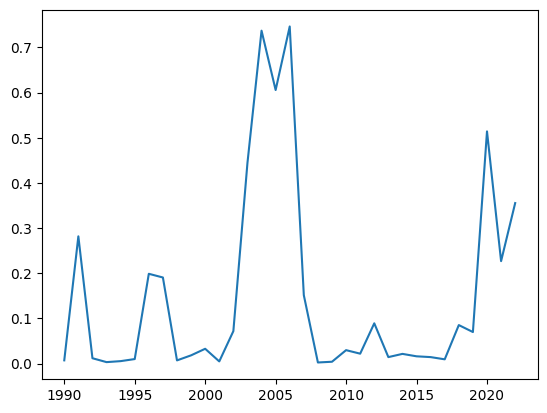

In [66]:

def plot_prob_series(country,start_year,end_year,lookback=5):
    
    sns.lineplot(x = list(range(start_year,end_year+1)),y=prob_series(country,start_year,end_year,lookback))
    
plot_prob_series('Mexico',1990,2022)




In [67]:
codes = pd.read_csv('../raw_data/country_code_example.csv')


def lambda_prob(row):
    
    prob_value = get_prob(row['Country from our model'],2021)
    
    return prob_value

code_dict = pd.Series(codes['Country from our model'].values,index=codes.Code).to_dict()

codes2 = codes[['Country from our model', 'Code']].dropna()

codes2['prob'] = codes2.apply(lambda x: lambda_prob(x),axis=1)
# codes2
# codes2['next_year_prob'] = get_prob(codes2['Country from our model'],2022)

codes2 = codes[['Country from our model', 'Code']].dropna()
code_dict_2 = dict(zip(code_dict.values(),code_dict.keys()))
code_dict_2['USA'] = 'USA'
code_dict_2['Uruguay'] = 'URY'

In [68]:

def get_year_probs(year):
    def lambda_prob(row):
    
        prob_value = get_prob(row['Country from our model'],year)
    
        return prob_value
    codes3 = codes[['Country from our model', 'Code']].dropna()
    
    codes3[year] = codes3.apply(lambda x: lambda_prob(x),axis=1)
    return codes3

get_year_probs(1990)

time_series_probs = [get_year_probs(i) for i in range(1990,2023)]


In [69]:
time_series_large = time_series_probs[0]

for i in range(1,len(time_series_probs)):
    time_series_large = pd.merge(time_series_large,time_series_probs[i],on=['Country from our model','Code'])



In [70]:
time_series_large

,Country from our model,Code,1990,1991,1992,1993,1994,1995,1996,1997,...,2013,2014,2015,2016,2017,2018,2019,2020,2021,2022
0,Afghanistan,AFG,0.046867,0.186421,0.355366,0.337089,0.329577,0.329577,0.475519,0.961141,...,0.990173,0.980761,0.995938,0.980620,0.963815,0.937913,0.969103,0.950595,0.988743,0.552272
1,Albania,ALB,0.092867,0.932377,0.134216,0.487502,0.845096,0.728610,0.894549,0.050939,...,0.009272,0.064313,0.068617,0.607827,0.576489,0.274456,0.188832,0.156944,0.870054,0.302016
2,Algeria,DZA,0.070901,0.884574,0.783002,0.648061,0.803938,0.821336,0.787675,0.013578,...,0.600014,0.111581,0.218529,0.993946,0.995894,0.394827,0.336011,0.142349,0.185262,0.185262
3,Angola,AGO,0.008160,0.050873,0.012260,0.006048,0.001340,0.001995,0.002700,0.029309,...,0.100490,0.016442,0.051404,0.046737,0.039333,0.744530,0.798590,0.778090,0.404112,0.248684
4,Argentina,ARG,0.292954,0.860533,0.840108,0.616460,0.567185,0.107585,0.113673,0.012291,...,0.004636,0.017155,0.001214,0.002874,0.013540,0.013048,0.028250,0.044898,0.027713,0.018599
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170,Venezuela,VEN,0.386460,0.190164,0.153121,0.412812,0.474096,0.027320,0.047737,0.291323,...,0.883292,0.977577,0.985520,0.832087,0.396570,0.333214,0.187205,0.062837,0.080040,0.076405
171,Vietnam,VNM,0.012539,0.423225,0.423225,0.418301,0.372343,0.372343,0.298174,0.006275,...,0.009704,0.014371,0.148225,0.531185,0.982854,0.980468,0.980468,0.975629,0.748668,0.684707
172,Yemen,YEM,0.196935,0.435528,0.798836,0.518785,0.860467,0.921289,0.930528,0.198744,...,0.990312,0.995044,0.996993,0.477979,0.466505,0.199168,0.045944,0.045944,0.026741,0.032222
173,Zambia,ZMB,0.041620,0.089670,0.103954,0.576673,0.002886,0.017659,0.016538,0.009785,...,0.021234,0.002887,0.001381,0.006574,0.008751,0.008176,0.006850,0.001727,0.003011,0.002072


In [71]:
time_series_probs[10]

,Country from our model,Code,2000
0,Afghanistan,AFG,0.956855
1,Albania,ALB,0.072844
2,Algeria,DZA,0.200393
3,Angola,AGO,0.975005
4,Argentina,ARG,0.022651
...,...,...,...
170,Venezuela,VEN,0.418378
171,Vietnam,VNM,0.110412
172,Yemen,YEM,0.185426
173,Zambia,ZMB,0.003698


<AxesSubplot: >

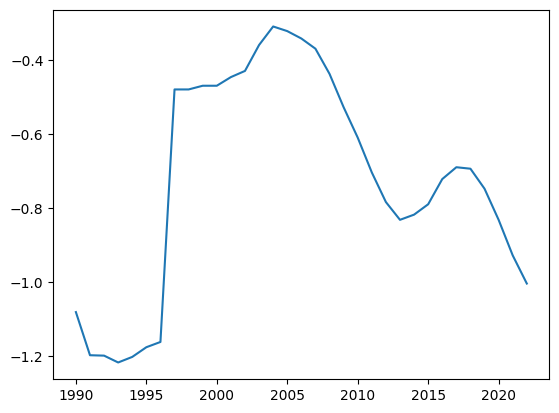

In [72]:
def plot_feature_series(country,feature,lookback=5):
    years = list(range(1990,2023))
    series = [get_imputed_df(country, i, lookback)[feature][0] for i in years]
    return sns.lineplot(x=years,y=series)


plot_feature_series('Iran','Control of corruption (-2.5 weak; 2.5 strong)')

# Downloading the data

In [73]:
csv_full['year_all'] = csv_full.apply(lambda x: get_year(x),axis=1)

In [74]:
time_series_large.to_csv('sara.csv')

In [75]:
# KEEP DOING FEATURE STUFF
# AUTOML LATER.. look at optimising over f1 and recall
# Run over a few random states to find good one
# look at a couple exmaples that are interesting over time (either by big changes in prob or unexpected countries)
# NLP on UN speeches
# 
codes2.head()

,Country from our model,Code
0,Afghanistan,AFG
1,Albania,ALB
2,Algeria,DZA
3,Angola,AGO
4,Argentina,ARG


In [76]:
list_of_full_dfs = []

for country in codes2['Country from our model']:
    df = get_imputed_df(country,1990) 
    df['country'] = country
    df['year'] = 1990
    list_of_full_dfs.append(df)





In [77]:
list_of_full_dfs[0]

,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Social globalization index (0-100),Homicides per 100000 people,Group grievance index 0 (low) - 10 (high),target,country,year
0,2.58939,67.877991,49.811688,-9.480469,-1.604538,-1.248441,-1.624123,19.182332,6.8,10.052863,16.85,30.478,12.354,10.294122,8.090997,0.5,Afghanistan,1990


In [78]:
len(list_of_full_dfs)

175

In [79]:
list_of_fuller_dfs = []

In [80]:
for df in list_of_full_dfs:
    
    country = df['country'][0]
    for year in range(1991,2023):
        new_year_df = get_imputed_df(country,year)
        new_year_df['country'] = country
        new_year_df['year'] = year
        
        df = pd.concat([df,new_year_df])
        
    list_of_fuller_dfs.append(df)
        
        
        

In [81]:
monster_df= list_of_fuller_dfs[0]

for i in range(1,len(list_of_fuller_dfs)):
    monster_df = pd.concat([monster_df,list_of_fuller_dfs[i]])




In [82]:
list_of_full_dfs[1]

,Economic growth: the rate of change of real GDP,Labor force participation rate,Trade openness: exports plus imports as percent of GDP,Trade balance as percent of GDP,Rule of law index (-2.5 weak; 2.5 strong),Control of corruption (-2.5 weak; 2.5 strong),Political stability index (-2.5 weak; 2.5 strong),Corruption Perceptions Index 100 = no corruption,Political rights index 7 (weak) - 1 (strong),Access to electricity percent of the population,Death rate per 1000 people,Economic globalization index (0-100),Social globalization index (0-100),Homicides per 100000 people,Group grievance index 0 (low) - 10 (high),target,country,year
0,3.01,60.404362,35.34,-1.726,-1.22587,-1.000516,-1.369758,24.176899,7.0,56.654038,5.876,23.976,32.206,10.651504,8.252606,0.5,Albania,1990


In [83]:


def get_year(row):
    
    year_value = row['CountryYear'][-4:]
    
    return int(year_value)

In [84]:
monster_df.head()

def prob_for_monsterdf(row):
    
    prob = get_prob(row['country'],row['year'])
    
    return prob

monster_df['prob'] = monster_df.apply(lambda x: prob_for_monsterdf(x),axis=1)

In [85]:
monster_df['code'] = monster_df['country'].map(code_dict_2)

In [86]:
monster_df.to_csv('full_feature_set.csv')